Ejercicio 5  "CADENA DE FARMACIAS"
==

 

pregunta1 : sacamos el argumento del precio de la relacion vende_ para añadirselo como atributo UNIQUE a la entidad medicamentos.

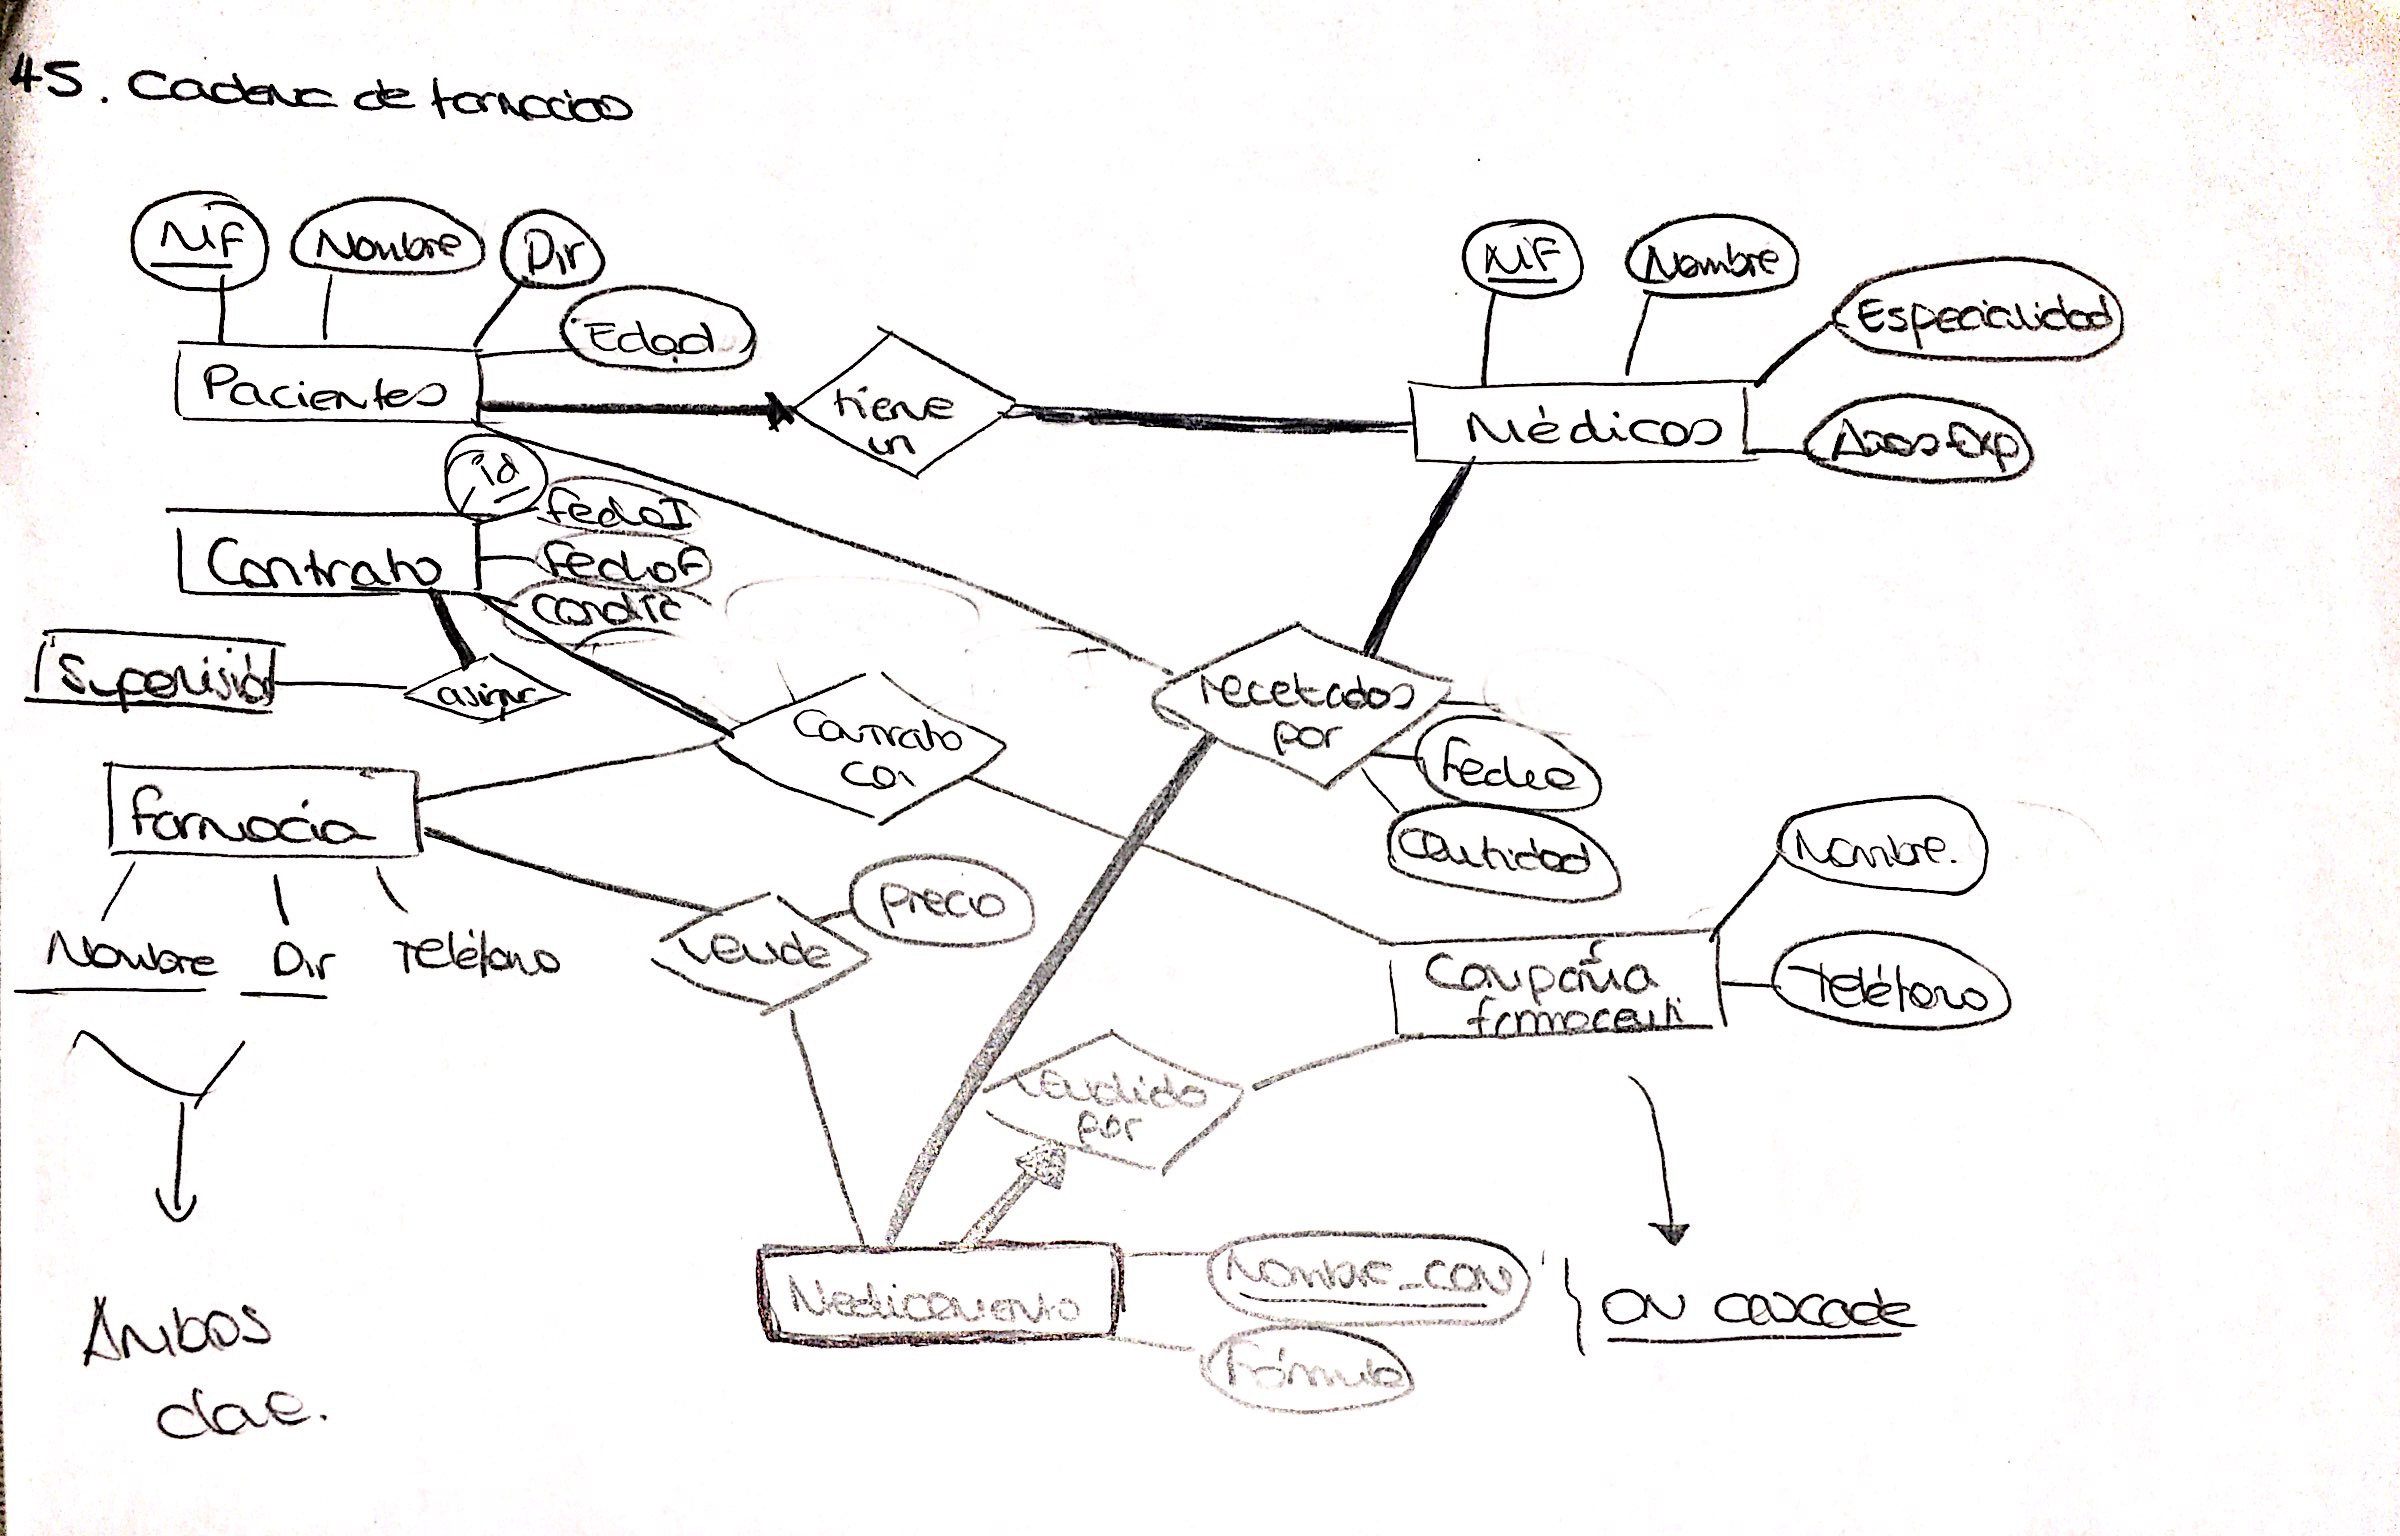

In [1]:
from IPython.display import Image

Image("./ej5.JPG")

In [1]:
%load_ext sql 

In [2]:
%sql sqlite:///ej5.db 

'Connected: None@ej5.db'

creamos las tablas de la base de datos

In [3]:
%%sql 
DROP TABLE IF EXISTS pacientes;
CREATE TABLE pacientes(
    nif  VARCHAR(10),
    nombre VARCHAR(30),
    direccion VARCHAR(30),
    edad INT,
    nif_medico VARCHAR(10) NOT NULL,
    PRIMARY KEY(nif)
);

Done.
Done.


[]

In [ ]:
%%sql 
DROP TABLE IF EXISTS medicos;
CREATE TABLE medicos(
    nif  VARCHAR(10) NOT NULL,
    nombre VARCHAR(30),
    especialidad VARCHAR(30),
    años_exp INT,
    nif_paciente VARCHAR(30) NOT NULL,
    PRIMARY KEY(nif)
);

In [6]:
%%sql 
DROP TABLE IF EXISTS farmaceutica;
CREATE TABLE farmaceutica(
    nombre VARCHAR(30),
    telefono INT,
    PRIMARY KEY(nombre)
);

Done.
Done.


[]

In [ ]:
%%sql 
DROP TABLE IF EXISTS farmacia;
CREATE TABLE farmacia(
    nombre VARCHAR(30),
    direc VARCHAR(30),
    telefono INT,
    PRIMARY KEY(nombre,direc)
);

In [7]:
%%sql 
DROP TABLE IF EXISTS contrato;
CREATE TABLE contrato(
    id INT,
    fecha_ini DATE,
    fecha_fin DATE,
    condiciones VARCHAR(50),
    PRIMARY KEY(id)
);

Done.
Done.


[]

Creamos la tabla para la relacion entre los Médicos y Pacientes.


In [9]:
%%sql 
DROP TABLE IF EXISTS tiene_un;
CREATE TABLE tiene_un(
    nif_pac VARCHAR(10),
    nif_med VARCHAR(10),
    PRIMARY KEY(nif_pac,nif_med),
    FOREIGN KEY (nif_med) REFERENCES medicos(nif),
    FOREIGN KEY (nif_med) REFERENCES pacientes(nif)
);

Done.
Done.


[]

Creamos la tabla para la relacion entre los medicos y los medicamentos

In [ ]:
%%sql 
DROP TABLE IF EXISTS recetado_por;
CREATE TABLE recetado_por(
    fecha DATE,
    cantidad iNT,
    nif_med VARCHAR(10),
    nombre VARCHAR(30),
    PRIMARY KEY(nombre,nif_med),
    FOREIGN KEY (nif_med) REFERENCES medicos(nif),
    FOREIGN KEY (nombre) REFERENCES medicamentos(nombre)
);

Relacion entre los medicamentos y las compañias farmaceuticas, donde los medicamentos son una entidad debil

In [10]:
%%sql 
DROP TABLE IF EXISTS vendidos;
CREATE TABLE vendidos(
    nombre VARCHAR(20),
    telefono INT,
    nombre_med VARCHAR(30) NOT NULL,
    PRIMARY KEY (nombre_med,nombre),
    FOREIGN KEY (nombre) REFERENCES farmaceutica (nombre)ON DELETE CASCADE
);

Done.
Done.


[]

Realizamos la relacion entre los medicamentos y la farmacia

In [20]:
%%sql 
DROP TABLE IF EXISTS vende;
CREATE TABLE vende(
    nombre_med VARCHAR(30),
    direc VARCHAR(30),
    precio FLOAT,
    nombre_far VARCHAR(30),
    FOREIGN KEY(nombre_far) REFERENCES farmacia(nombre)
);

Done.
Done.


[]

realizamos la tabla contrato para relacionar las farmaceuticas, contrato, farmacia

In [21]:
%%sql 
DROP TABLE IF EXISTS contrato_con;
CREATE TABLE contrato_con(
    nombre_far VARCHAR(30),
    nombre_farmacia VARCHAR(30),
    id INT,
    PRIMARY KEY (nombre_far,nombre_farmacia,id),
    FOREIGN KEY(nombre_farmacia) REFERENCES farmacia(nombre)
    FOREIGN KEY(nombre_far) REFERENCES farmaceutica(nombre)
    FOREIGN KEY(id) REFERENCES contrato(id)

);

Done.
Done.


[]

Tabla asigna que nos relaciona el contrato con un supervisor

In [22]:
%%sql 
DROP TABLE IF EXISTS asigna;
CREATE TABLE asigna(
    id INT NOT NULL,
    supervisor VARCHAR(30),
    PRIMARY KEY(id,supervisor),
    FOREIGN KEY(id) REFERENCES contrato(id)

);
  

Done.
Done.


[]